In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [198]:
#constants

nr_iters = 100

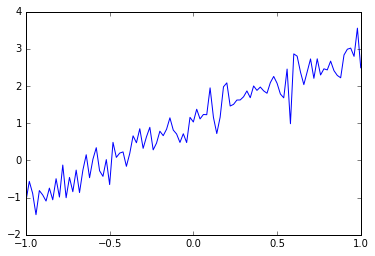

In [271]:
#inputs
x = np.linspace(-1, 1, 101)
y = 2 * x + np.random.randn(*x.shape) * 0.33 + 1
plt.plot(x,y)
plt.show()

In [272]:
#reshaping the inputs to 2 dimensional
x = np.reshape(x, [-1,1]) #dims 101 x 1
y = np.reshape(y, [-1,1]) #dims 101 x 1
print(x.shape, y.shape)

(101, 1) (101, 1)


In [273]:
#variables and placeholders
tf.reset_default_graph()

X = tf.placeholder(tf.float32, [None, 1]) #dims (# oz rows ) x 1
Y = tf.placeholder(tf.float32, [None, 1]) #dims (# oz rows ) x 1

w = tf.get_variable(name='weights', shape=[1, 1], initializer=tf.truncated_normal_initializer()) #dims 1 x 1
b = tf.get_variable(name='biases', shape=[1, 1], initializer=tf.constant_initializer()) #dims 1 x 1

#dim is 1 x 1 because for each row there is only one input (x) and one output (y)


In [274]:
#model
Y_pred = tf.matmul(X,w) + b

In [275]:
#Optimizer and Cost function
cost = tf.reduce_sum(tf.squared_difference(Y, Y_pred))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(cost)

In [276]:
#Running the graph
cost_list = []

with tf.Session() as sess:
    tf.initialize_all_variables().run()
    
    for i in range(nr_iters):
        cost_list.append(sess.run([cost, optimizer], feed_dict={X: x, Y: y}))
        
#         cost_i = cost.eval(feed_dict={X: x, Y: y})
#         cost.append(cost_i)

#         if i // 10 == 0:
#             plot(cost)
    res = Y_pred.eval(feed_dict={X:x})
    print('w:', sess.run(w)[0][0], 'b:', sess.run(b)[0][0])
    
    

w: 2.02081 b: 1.01126


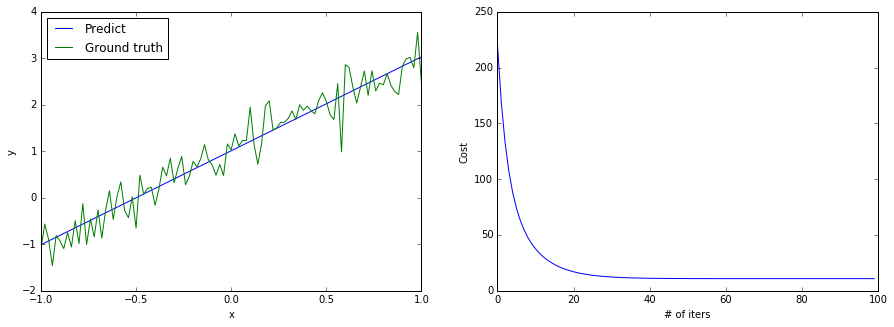

In [280]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.plot(x,res, label='Predict')
plt.plot(x, y, label='Ground truth')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best')

plt.subplot(1,2,2)
plt.plot(cost_list)
plt.xlabel('# of iters')
plt.ylabel('Cost')

plt.show()